<a href="https://colab.research.google.com/github/CrypticMessenger/Digit_classification_using_CNNs/blob/main/Using_Image_transformation_to_allign_region_of_interest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import data,transform # To input standard images
from matplotlib import pyplot as plt # To plot images
from skimage.color import rgb2gray # To convery RGB image to grayscale
from skimage.feature import corner_harris, corner_subpix, corner_peaks # Library for Harris corner detection
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


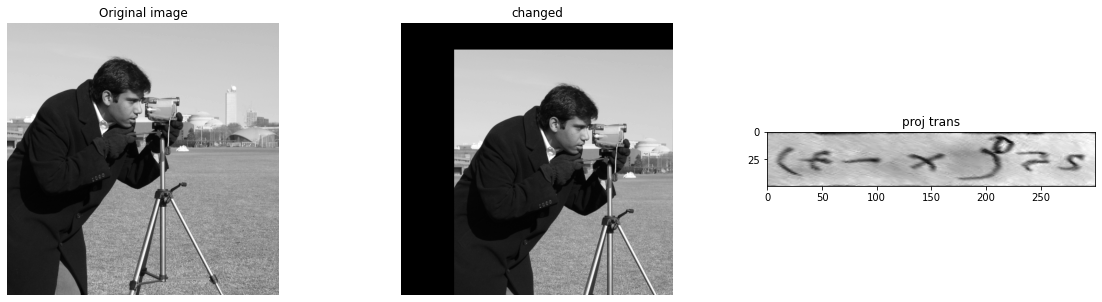

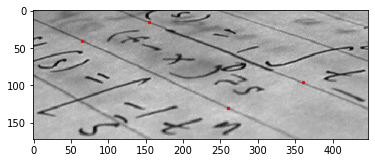

In [ ]:
img = data.camera()
img = rgb2gray(img)


trans_mat = np.array([[1,0,0],[0,1,0],[0.1,0.1,0]])
scale = (1,1)
rotation = 0
shear = 0
translation = (100,50)

wrap_trans =  transform.AffineTransform(scale=scale, rotation=rotation, shear=shear,translation=translation)
proj_trans = transform.ProjectiveTransform(trans_mat)
# wrap_trans =  transform.AffineTransform(trans_mat)
trans_img = transform.warp(img,wrap_trans.inverse)
proj_trans_img = transform.warp(img,proj_trans)


text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3, output_shape=(50, 300))





fig, axarr = plt.subplots(1,3,figsize=(20,5)) 
axarr[0].imshow(img,cmap='gray')
axarr[0].set_title('Original image')
axarr[0].axis('off')
axarr[1].imshow(trans_img,cmap=plt.cm.gray)
axarr[1].set_title('changed')
axarr[1].axis('off')
axarr[2].imshow(warped,cmap=plt.cm.gray)
axarr[2].set_title('proj trans')
axarr[2].axis('on')
plt.show()

plt.imshow(data.text(),cmap='gray')
# plt.plot(640, 570, "og", markersize=10)  # og:shorthand for green circle
plt.scatter(dst[:, 0], dst[:, 1], marker="o", color="red", s=5)
